In [2]:
import pickle
from os import path

In [3]:
DIR = "./output/206"
model_dir = path.join(DIR, "BRZ+TW+NASDAQ-Training-swap-nopunish-7d100-0-model.model")
model = pickle.load(open(model_dir, "rb"))

c:\users\lzcai\anaconda3\envs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\lzcai\anaconda3\envs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\lzcai\anaconda3\envs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\lzcai\anaconda3\envs\tensorflow2\lib\site-pack

In [16]:
for key in model[1]:
    print(key)
    print(model[1][key].shape)

model/pi_fc0/w:0
(36, 64)
model/pi_fc0/b:0
(64,)
model/vf_fc0/w:0
(36, 64)
model/vf_fc0/b:0
(64,)
model/pi_fc1/w:0
(64, 64)
model/pi_fc1/b:0
(64,)
model/vf_fc1/w:0
(64, 64)
model/vf_fc1/b:0
(64,)
model/vf/w:0
(64, 1)
model/vf/b:0
(1,)
model/pi/w:0
(64, 4)
model/pi/b:0
(4,)
model/pi/logstd:0
(1, 4)
model/q/w:0
(64, 4)
model/q/b:0
(4,)


In [11]:
DIR = "./output/205"
record_dir = path.join(DIR, "TW+NASDAQ+BRZ-Training-swap-nopunish_detailed-ModelNo-100000-8.out")
record = pickle.load(open(record_dir, "rb"))

In [103]:
def plot_comparison(DIR, fileName, title):
    import matplotlib.pyplot as plt
    import numpy as np

    record_dir = path.join(DIR, fileName)
    record = pickle.load(open(record_dir, "rb"))

    labels = ["high-^BVSP", "mid-^TWII", "low-^IXIC"]
    x = [tmp['date'] for tmp in record]
    y_dict = {}
    plt.rcParams['figure.facecolor'] = 'white'
    fig, axs = plt.subplots(2,figsize=(40,20))
    plt.suptitle(title, fontsize=16)

    width = 0.9
    for i in range(2,-1,-1): # Inverse: Low-Mid-High
        y = np.array([tmp['inventory'][i] for tmp in record])
        if i == 2:
            axs[0].bar(x, y, width)
            axs[0].plot(x,y, label=labels[i])
            y_dict[i] = y
        else:
            axs[0].bar(x, y, width, bottom=y_dict[i+1])
            axs[0].plot(x,y+y_dict[i+1],label =labels[i])
            y_dict[i] = (y+y_dict[i+1])

    axs[0].axhline(y=300000, color = "grey", linestyle='--')
    axs[0].set_ylim((0, 600000))
    axs[0].legend()
    axs[0].set_title('Portfolio Weights')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Market Value (US$)')




    DIR = "./data"
    file_names = ["^BVSP", "^TWII", "^IXIC"]
    labels = ["high-", "mid-", "low-"]

    # axs[1].figure(figsize = (40,15))
    for i in range(2,-1,-1): # Inverse: Low-Mid-High
        df = csv2df(DIR, file_names[i]+".csv",source = "yahoo")
        df = df[(df['Date']>=pd.to_datetime("2015-01-01"))&(df['Date']<=pd.to_datetime("2019-12-31"))].reset_index(drop=True)

        j = 0
        init_price = df['Price'][j]
        while np.isnan(init_price):
            j+=1
            init_price = df['Price'][j]
        y = np.log(df['Price'][j:] / init_price)
        x = df['Date'][j:]
        axs[1].plot(x,y,label = labels[i]+file_names[i])

    axs[1].plot([tmp['date'] for tmp in record], np.log([tmp['net_worth'] for tmp in record]/record[0]['net_worth']), label = "RL Portfolio")
    axs[1].axhline(y=0, color = "grey", linestyle='--')
    axs[1].set_ylim((-0.5,1))
    axs[1].legend()
    axs[1].set_title('Log Market Price')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('log(Market Price)')
    plt.show()


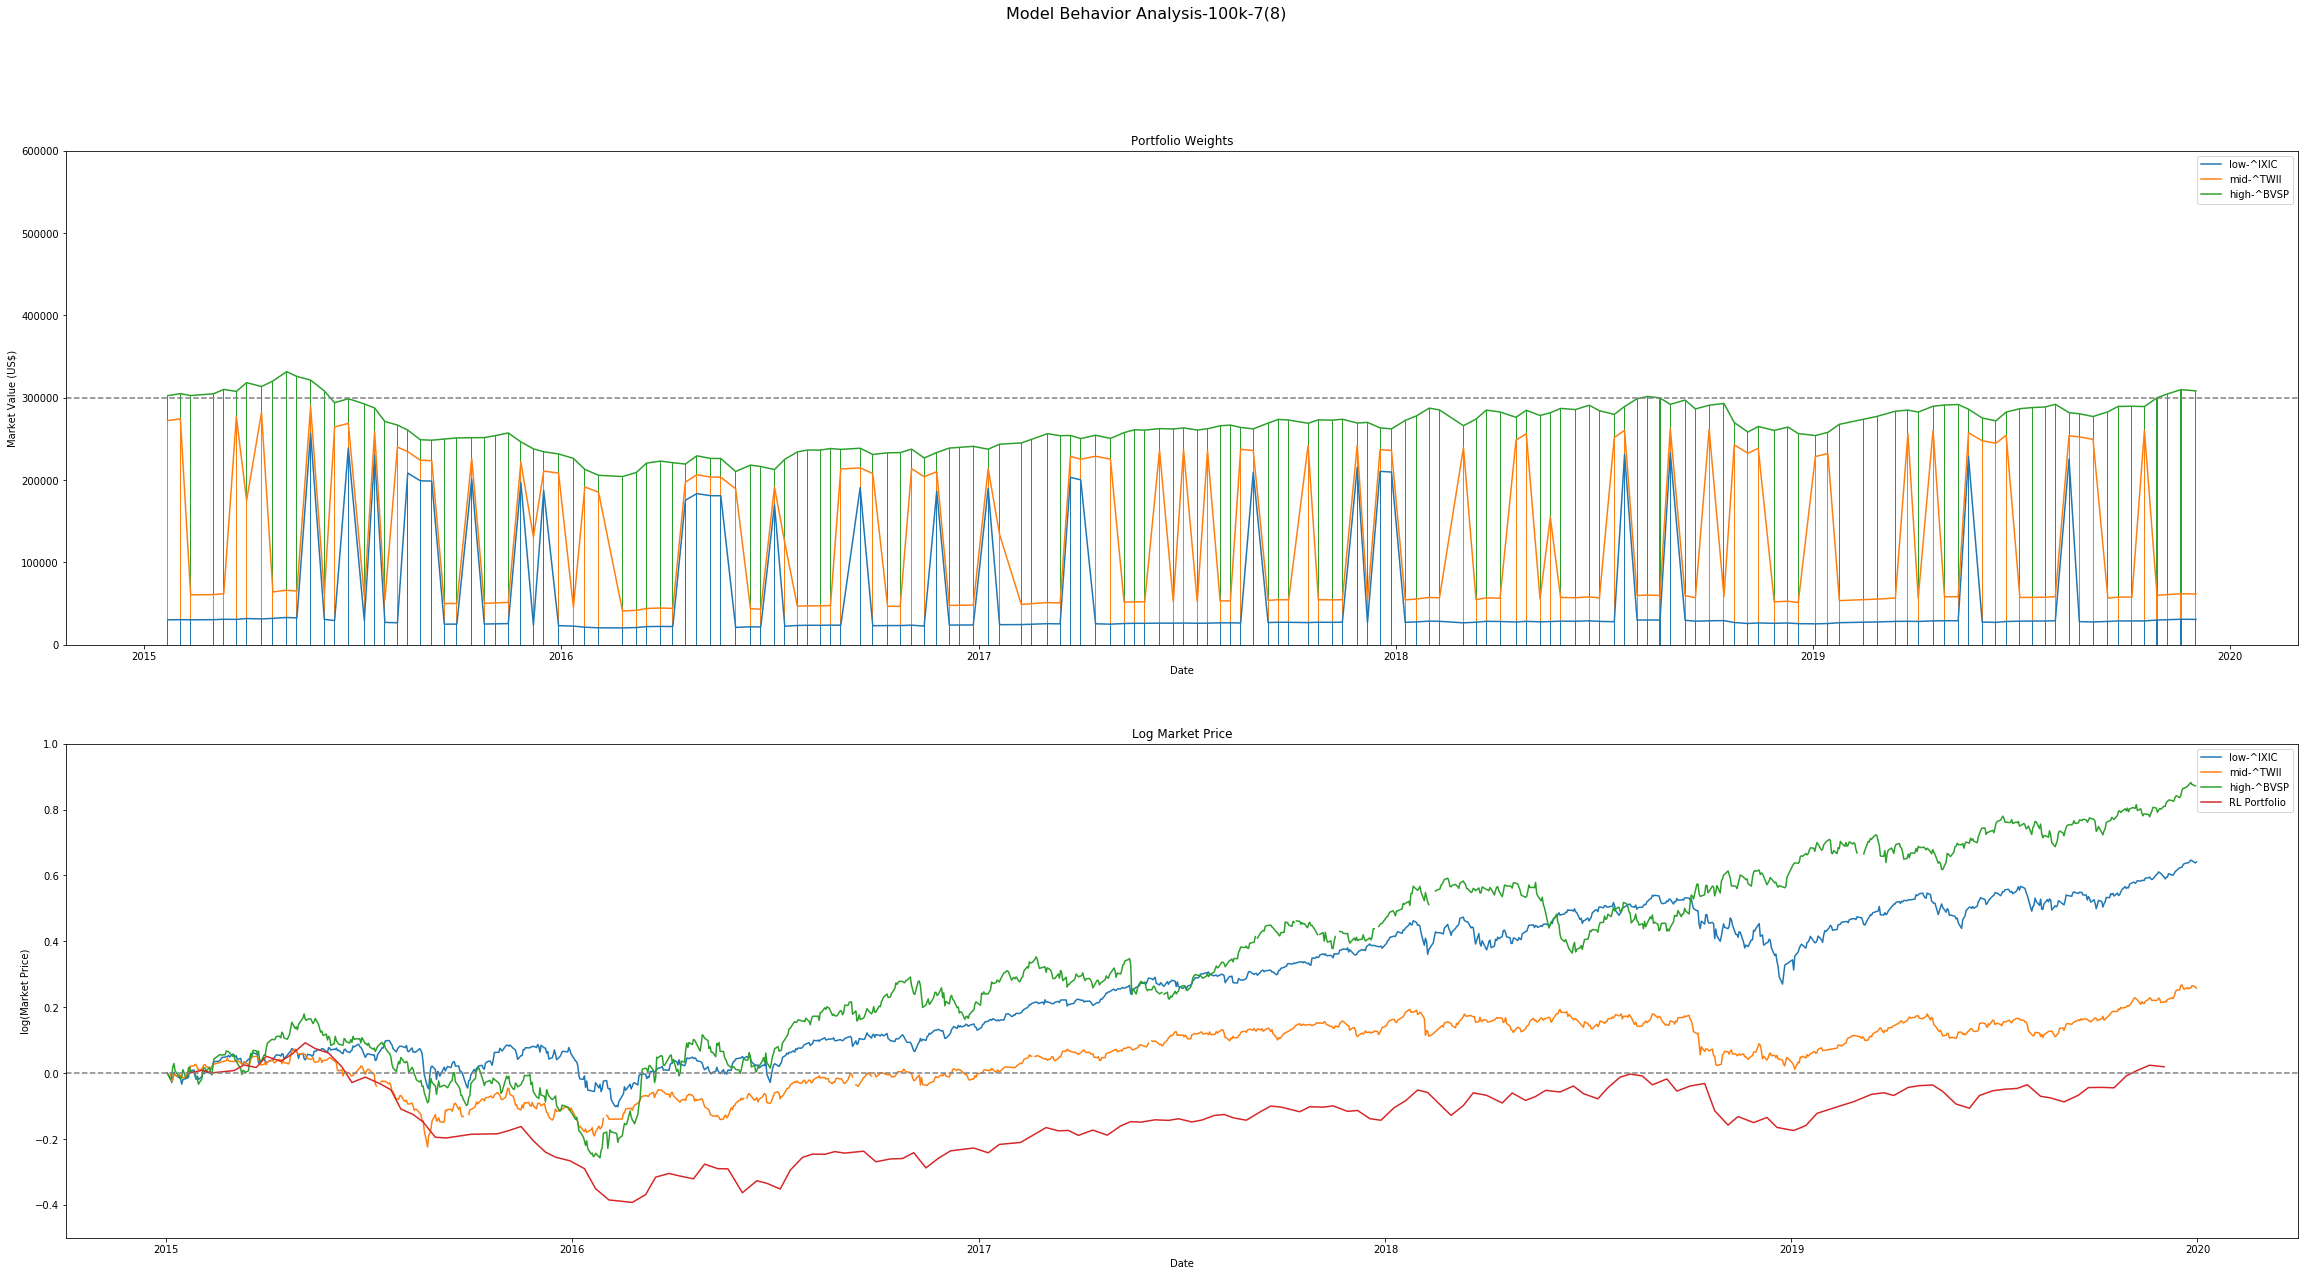

In [108]:
plot_comparison("./output/205", "TW+NASDAQ+BRZ-Training-swap-nopunish_detailed-ModelNo-100000-7.out", "Model Behavior Analysis-100k-7(8)")

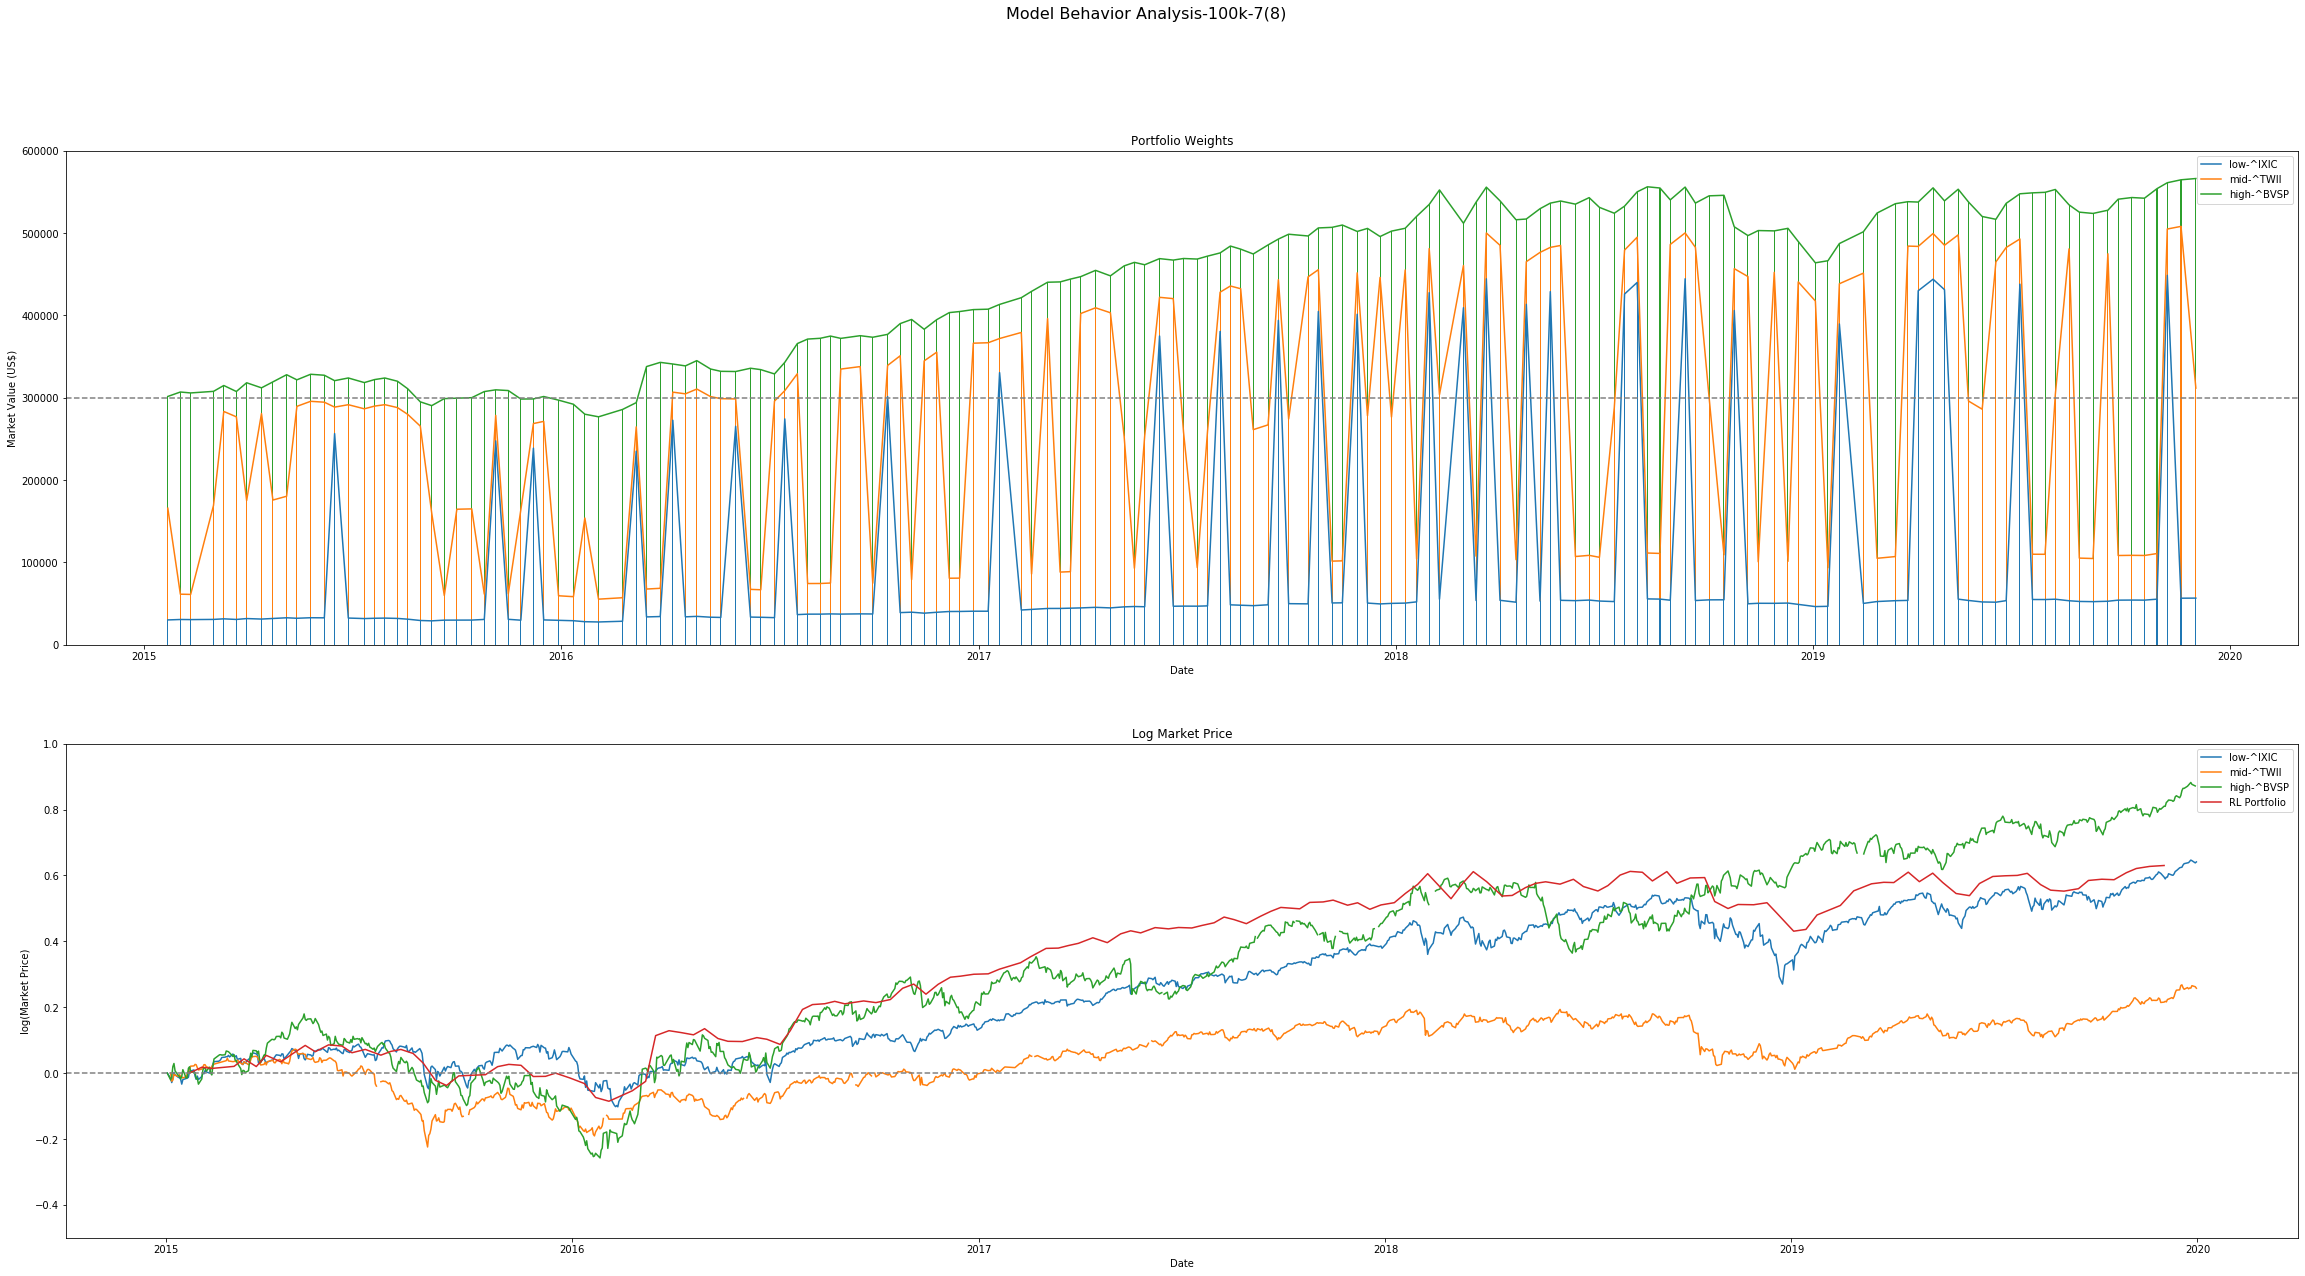

In [109]:
plot_comparison("./output/205", "TW+NASDAQ+BRZ-Training-swap-nopunish_detailed-ModelNo-100000-8.out", "Model Behavior Analysis-100k-7(8)")

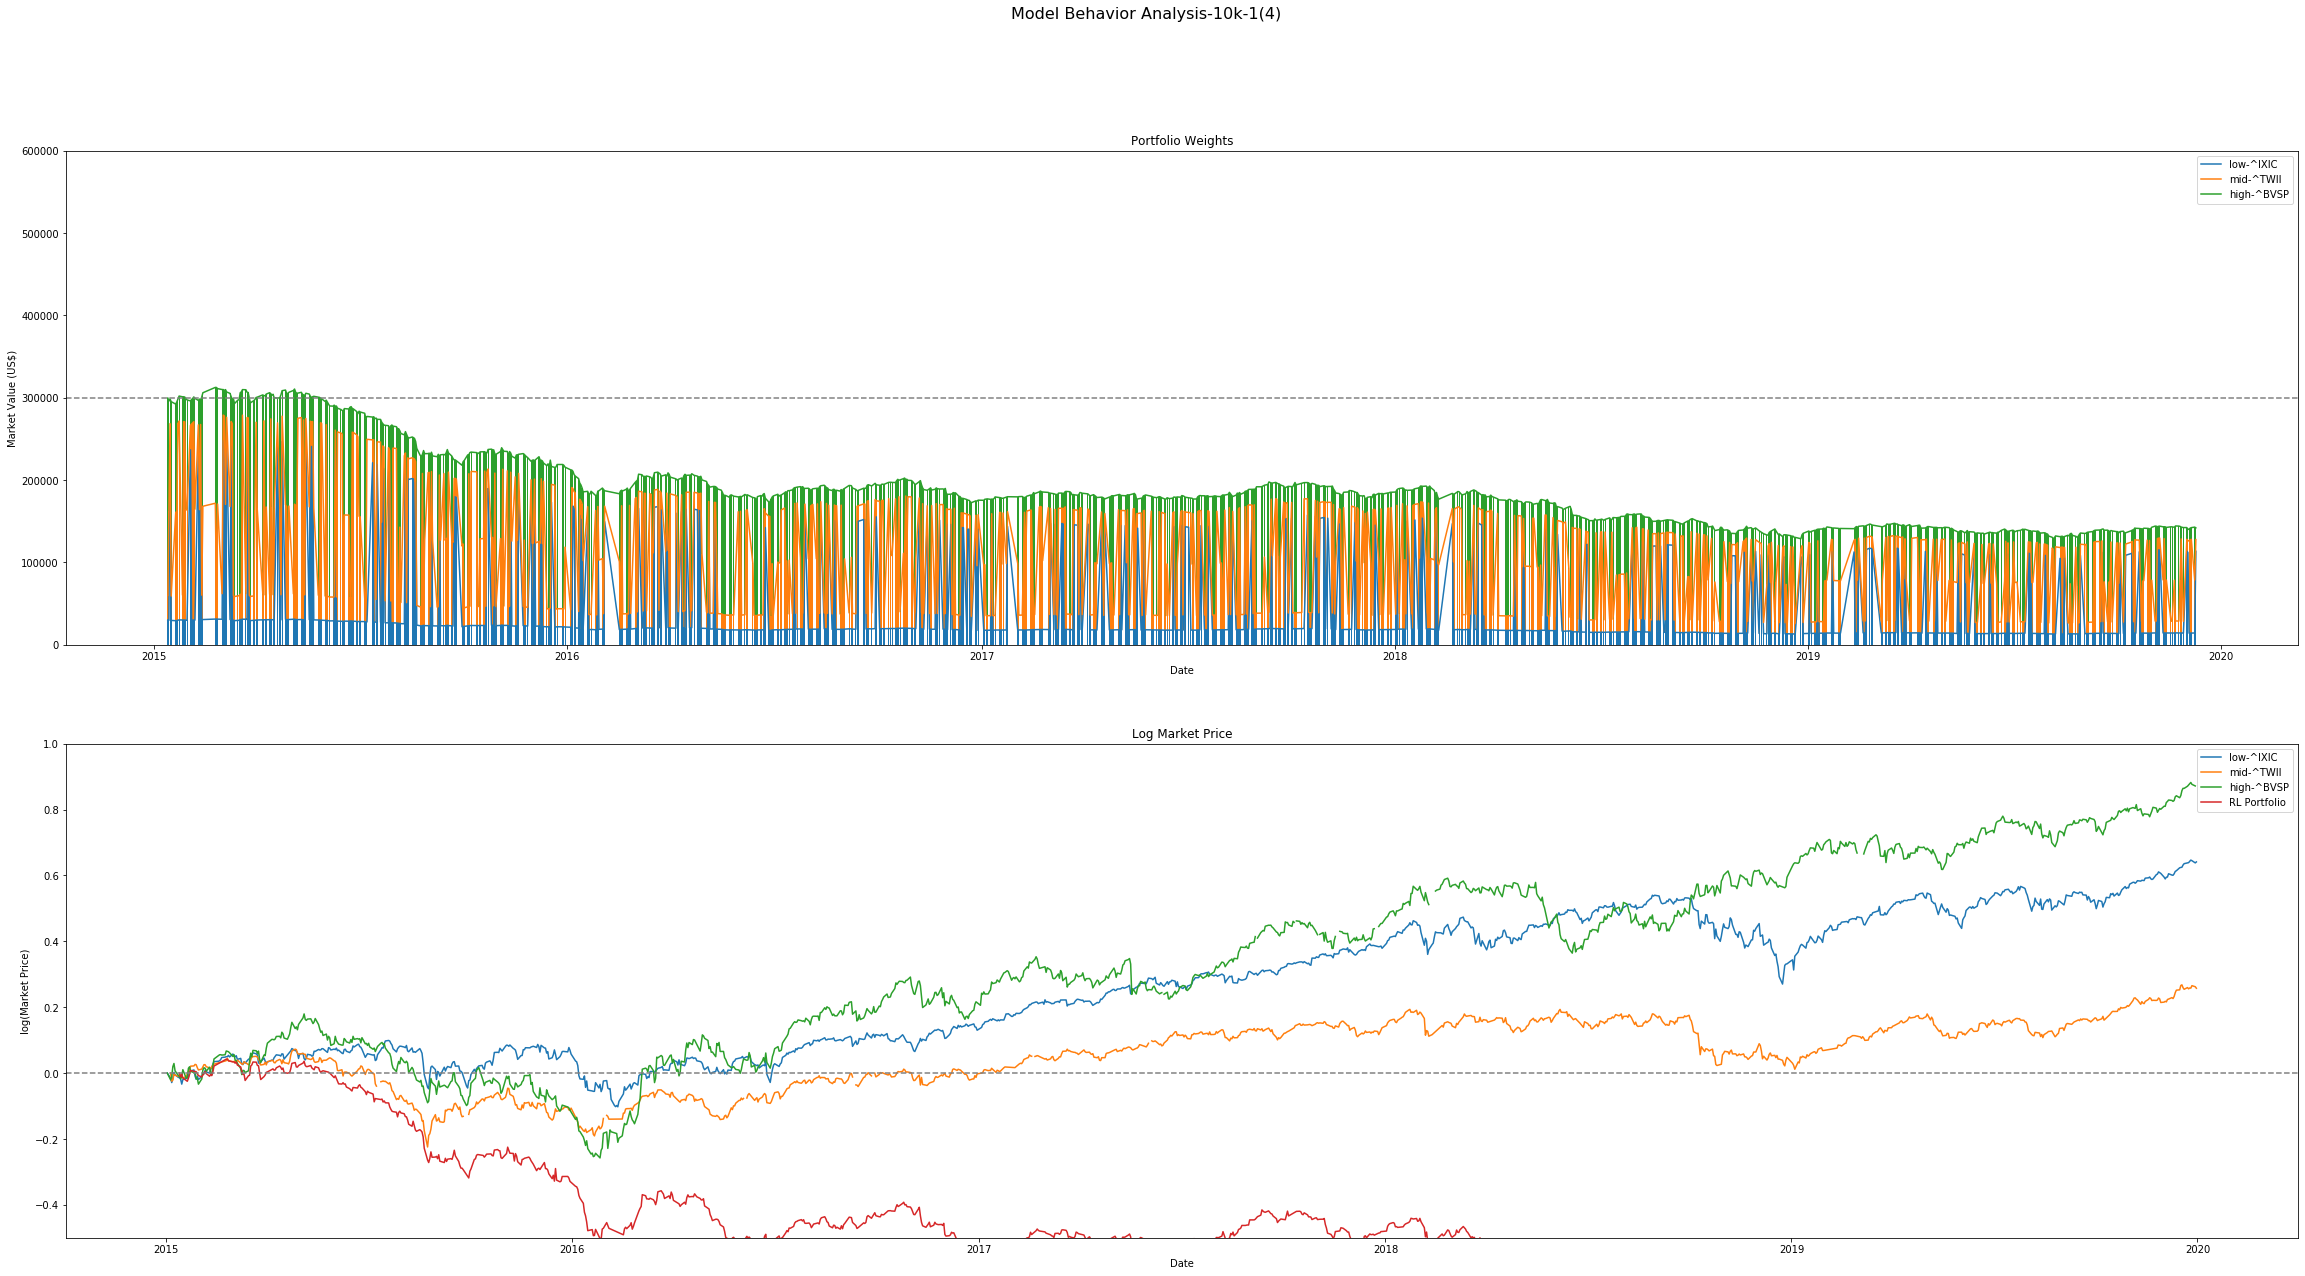

In [110]:
plot_comparison("./output/200", "BRZ+TW+NASDAQ-Training_detailed-ModelNo-10000-4.out", "Model Behavior Analysis-10k-1(4)")

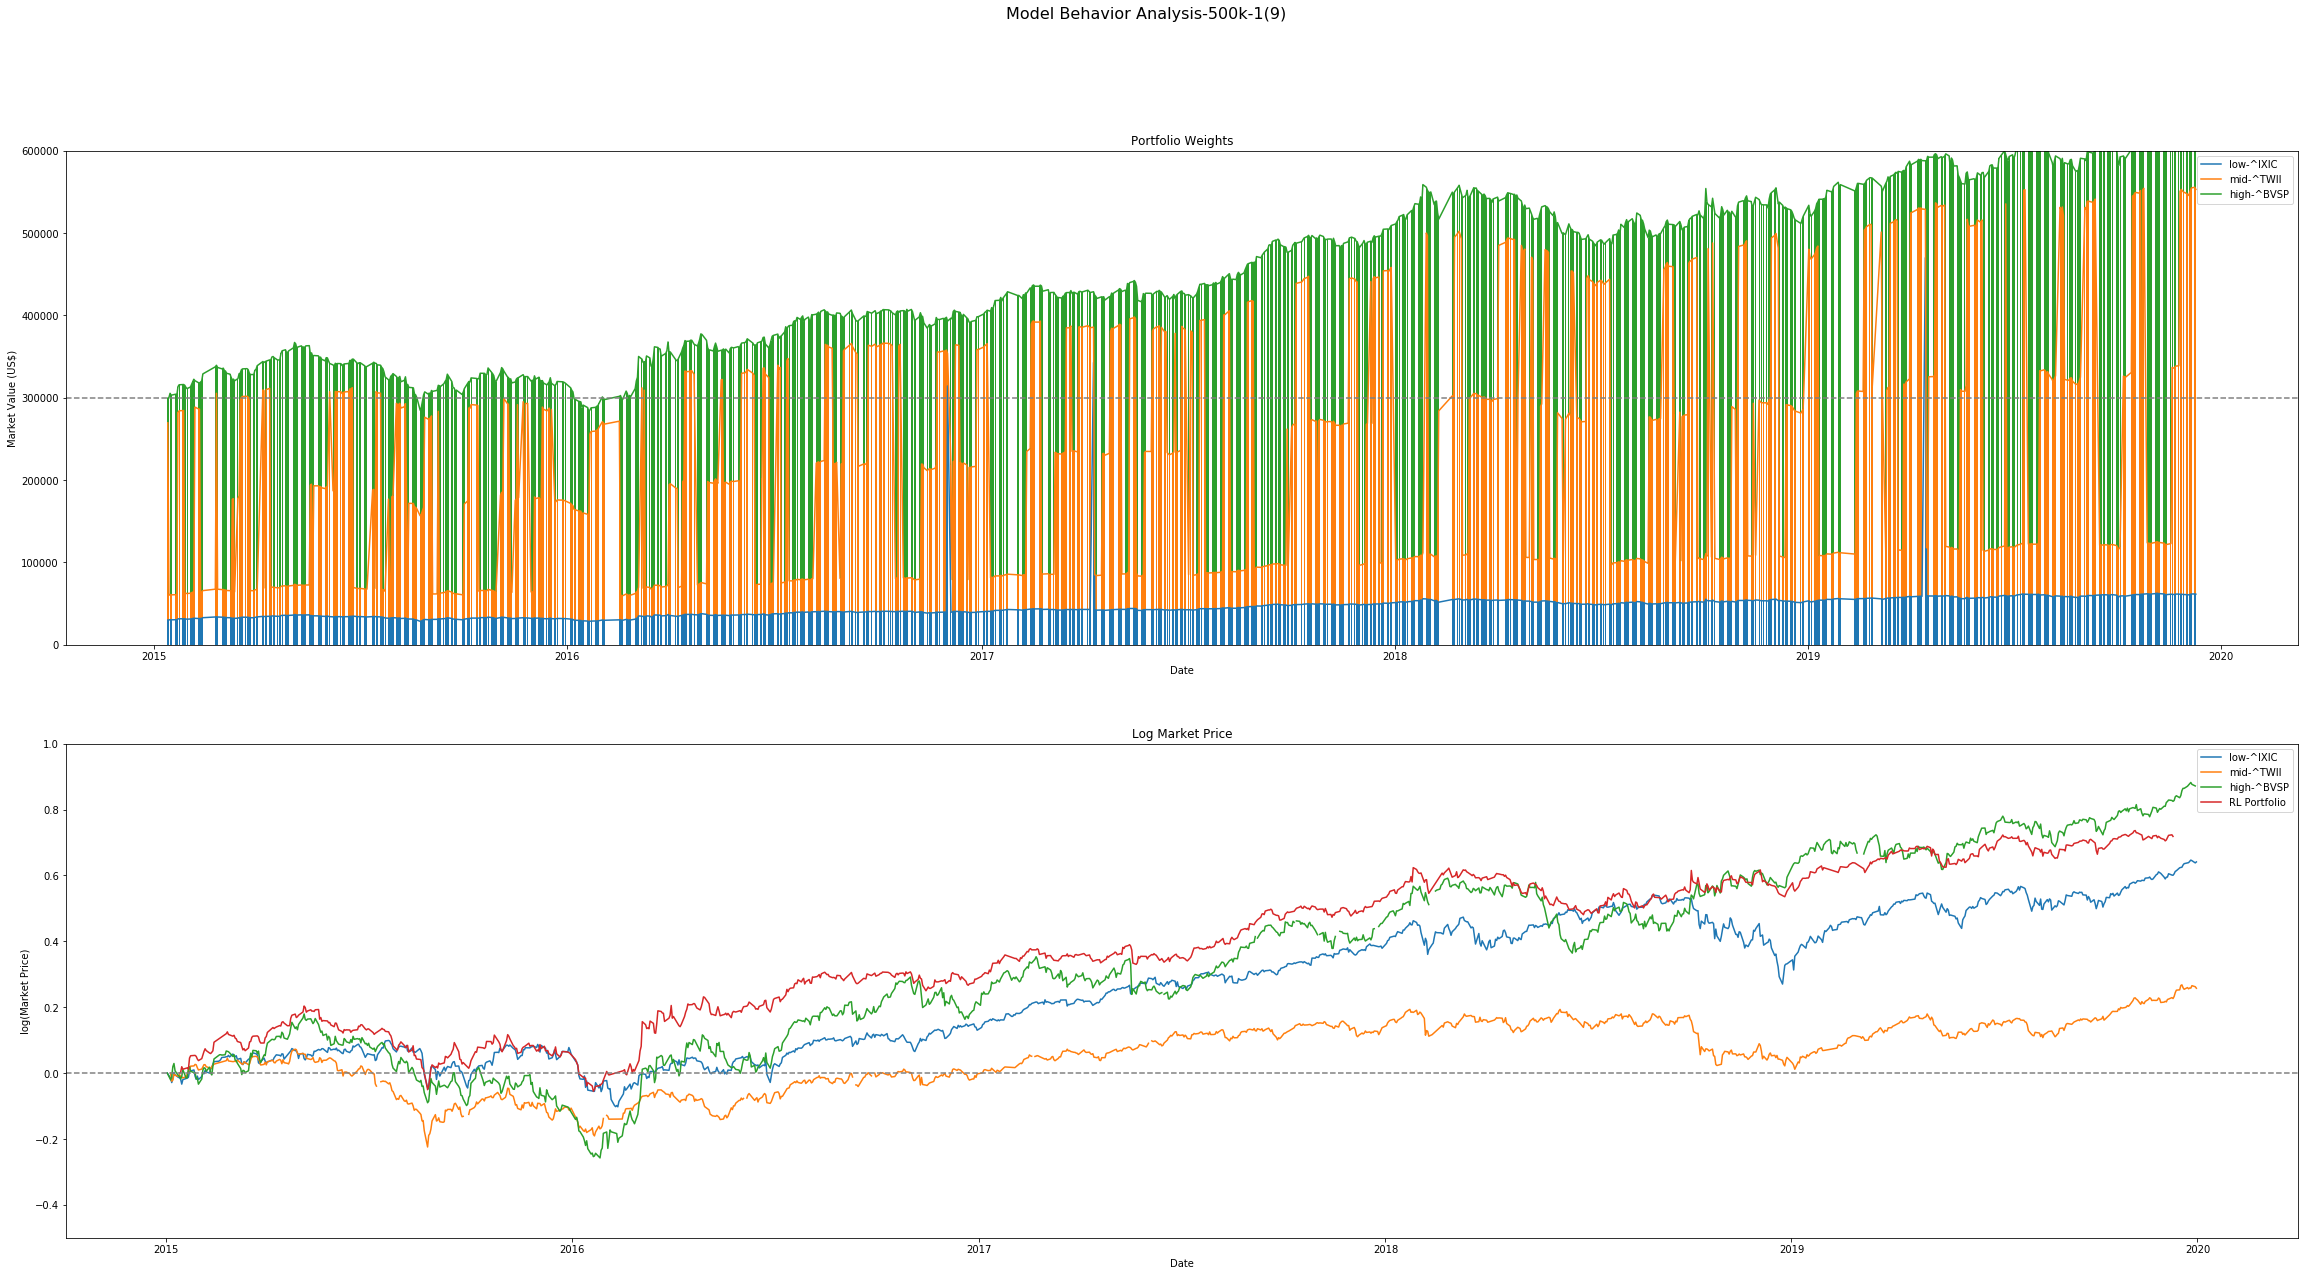

In [111]:
plot_comparison("./output/202", "BRZ+TW+NASDAQ-Training_detailed-ModelNo-500000-9.out", "Model Behavior Analysis-500k-1(9)")


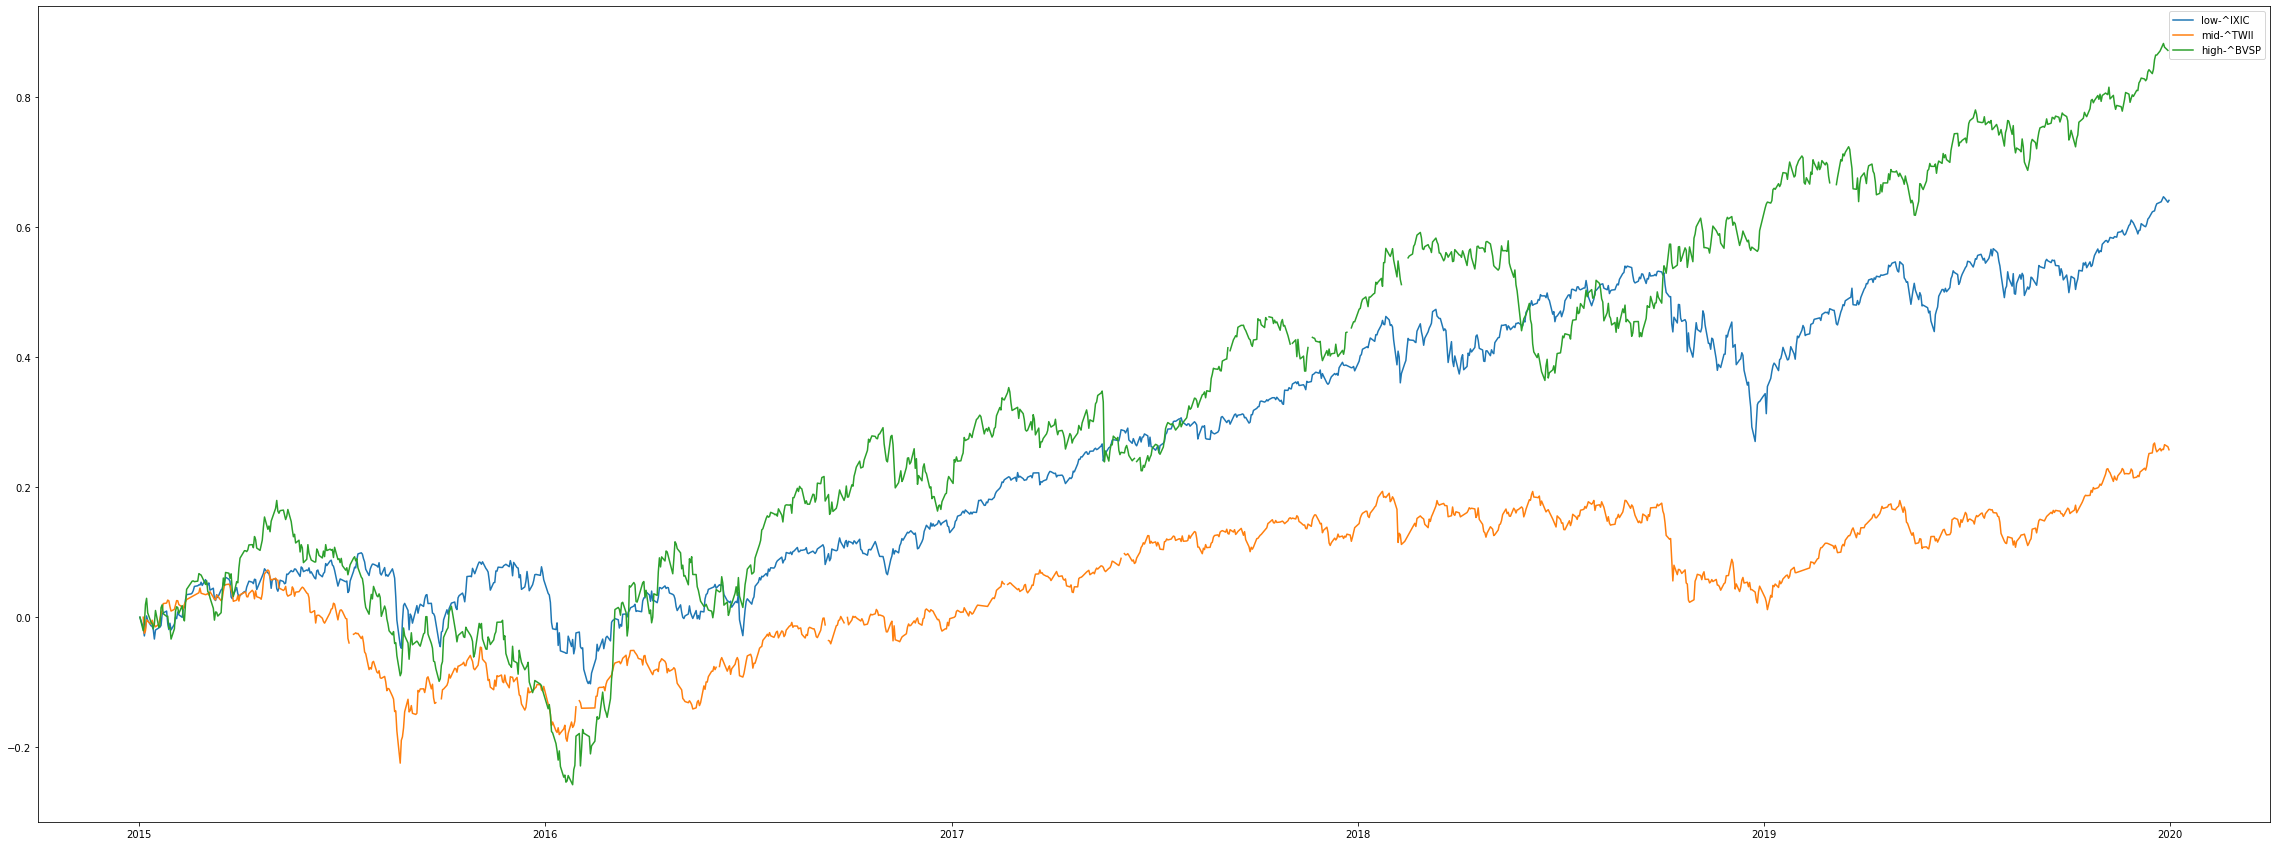

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from os import path
from CSVUtils import *

DIR = "./data"
file_names = ["^BVSP", "^TWII", "^IXIC"]
labels = ["high-", "mid-", "low-"]

plt.figure(figsize = (40,15))
for i in range(2,-1,-1): # Inverse: Low-Mid-High
    df = csv2df(DIR, file_names[i]+".csv",source = "yahoo")
    df = df[(df['Date']>=pd.to_datetime("2015-01-01"))& (df['Date']<=pd.to_datetime("2019-12-31"))].reset_index(drop=True)
    
    j = 0
    init_price = df['Price'][j]
    while np.isnan(init_price):
        j+=1
        init_price = df['Price'][j]
    y = np.log(df['Price'][j:] / init_price)
    x = df['Date'][j:]
    plt.plot(x,y,label = labels[i]+file_names[i])
plt.legend()

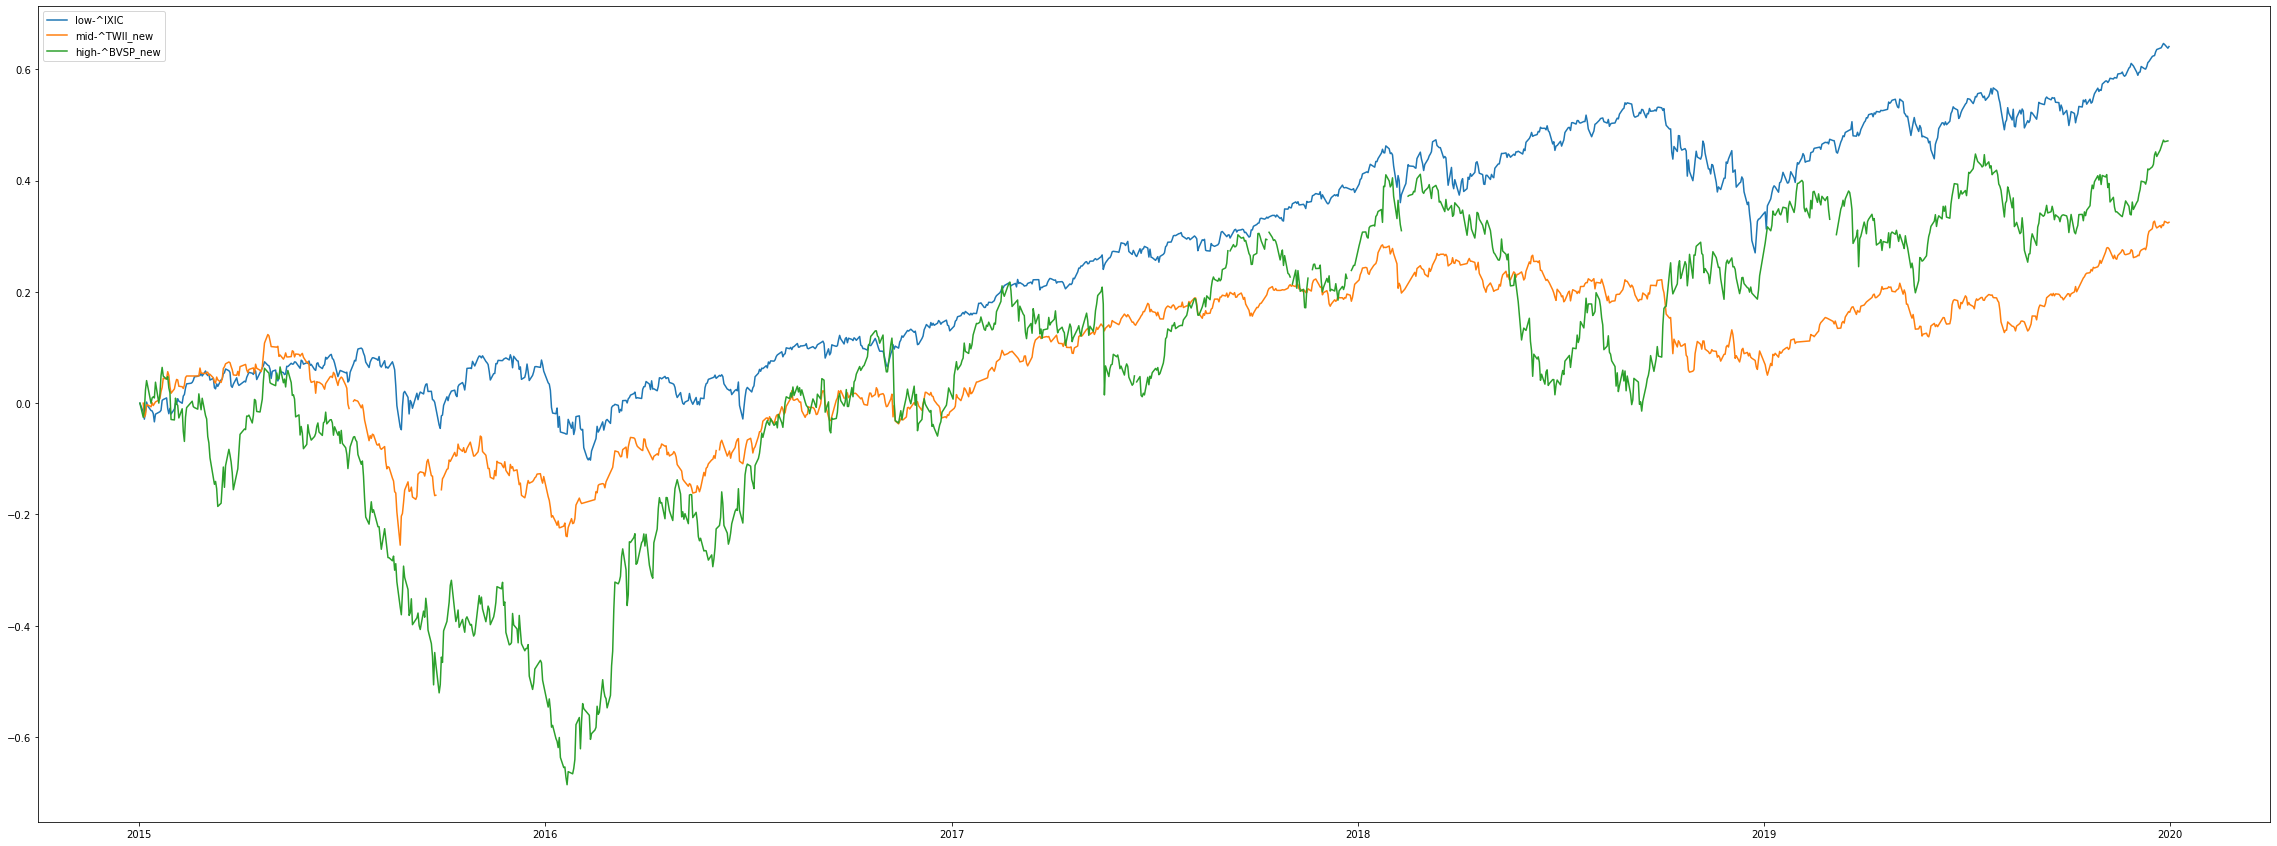

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from os import path
from CSVUtils import *

DIR = "./data"
file_names = ["^BVSP_new", "^TWII_new", "^IXIC"]
labels = ["high-", "mid-", "low-"]

plt.figure(figsize = (40,15))
for i in range(2,-1,-1): # Inverse: Low-Mid-High
    if file_names[i][-4:]=="_new":
        source = "done"
    else:
        source = "yahoo"
    df = csv2df(DIR, file_names[i]+".csv",source = source)
    
    df = df[(df['Date']>=pd.to_datetime("2015-01-01"))& (df['Date']<=pd.to_datetime("2019-12-31"))].reset_index(drop=True)
    
    j = 0
    init_price = df['Price'][j]
    while np.isnan(init_price):
        j+=1
        init_price = df['Price'][j]
    y = np.log(df['Price'][j:] / init_price)
    x = df['Date'][j:]
    plt.plot(x,y,label = labels[i]+file_names[i])
plt.legend()

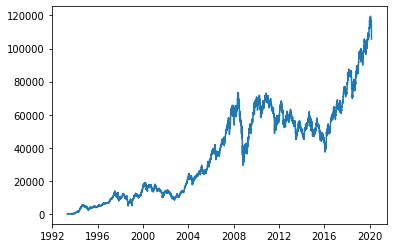

In [62]:
from os import path
import pandas as pd
DIR = "./data"
name = "^BVSP"
df = pd.read_csv(path.join(DIR, name+'.csv'))
x = pd.to_datetime(df['Date'])
y = df['Close']
plt.plot(x,y)